Task 1: Load and Explore the Dataset
--------------------------------------------------
Dataset loaded successfully!

First 5 rows of the dataset:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


None


Missing values in each column:


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


No missing values found in the dataset.


Task 2: Basic Data Analysis
--------------------------------------------------

Basic statistics of numerical columns:


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000



Average scores by gender:


,math score,reading score,writing score,total score
gender,,,,
female,63.633205,72.608108,72.467181,208.708494
male,68.728216,65.473029,63.311203,197.512448



Average scores by parental level of education:


,math score,reading score,writing score,total score
parental level of education,,,,
master's degree,69.745763,75.372881,75.677966,220.796610
bachelor's degree,69.389831,73.000000,73.381356,215.771186
associate's degree,67.882883,70.927928,69.896396,208.707207
some college,67.128319,69.460177,68.840708,205.429204
some high school,63.497207,66.938547,64.888268,195.324022
high school,62.137755,64.704082,62.448980,189.290816



Average scores by lunch type:


,math score,reading score,writing score,total score
lunch,,,,
free/reduced,58.921127,64.653521,63.022535,186.597183
standard,70.034109,71.654264,70.823256,212.511628



Average scores by test preparation course:


,math score,reading score,writing score,total score
test preparation course,,,,
completed,69.695531,73.893855,74.418994,218.008380
none,64.077882,66.534268,64.504673,195.116822



Key findings from the analysis:
1. Students with 'standard' lunch tend to perform better than those with 'free/reduced' lunch.
2. Students who completed the test preparation course perform better on average.
3. Parental education level appears to correlate with student performance.
4. Gender differences exist in subject performance (e.g., math vs reading/writing).


Task 3: Data Visualization
--------------------------------------------------


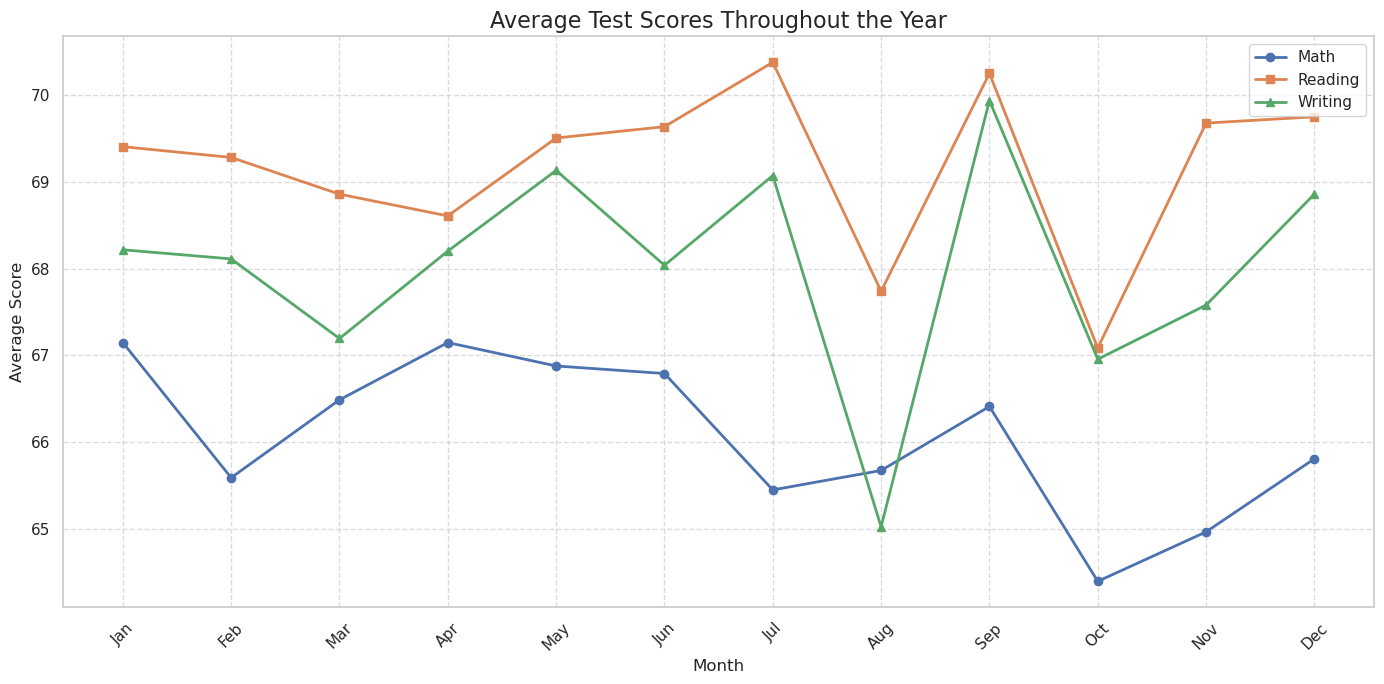

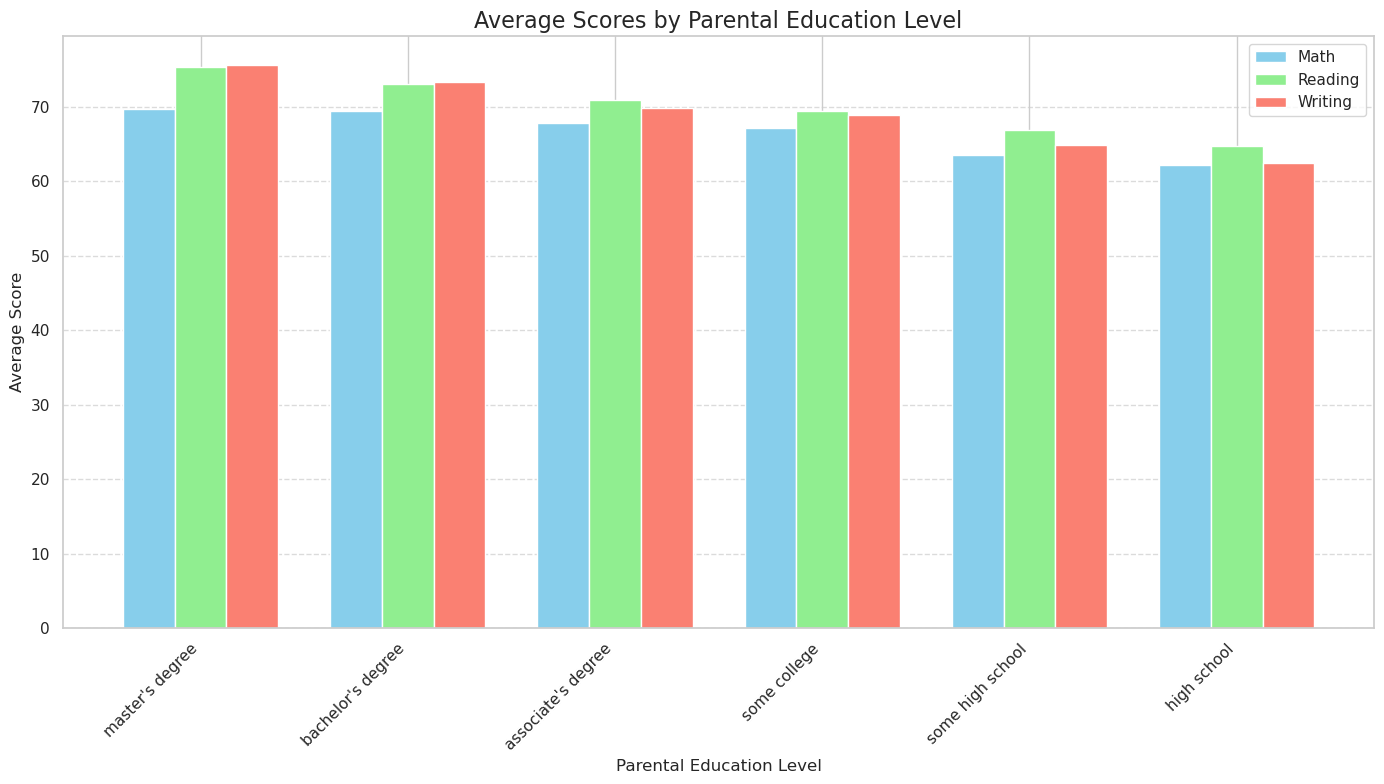

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


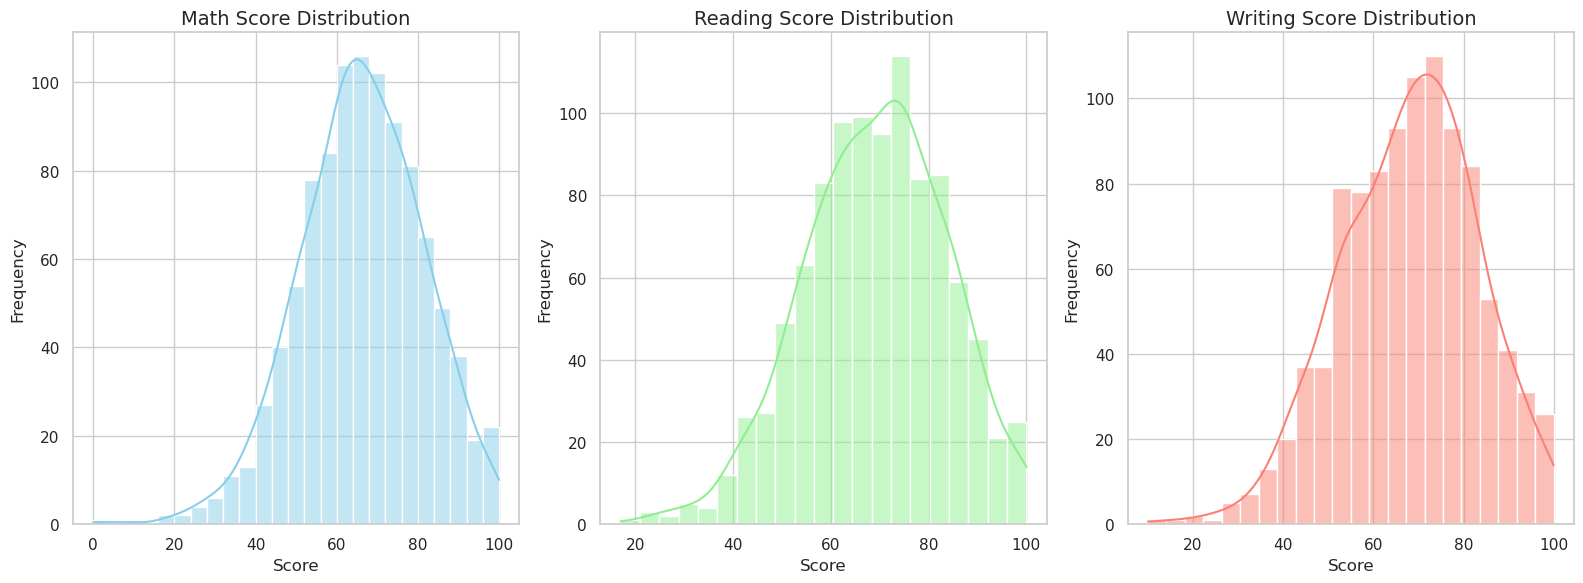

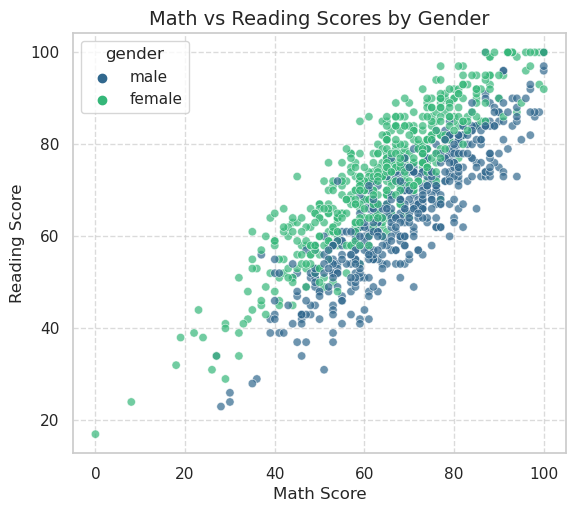

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

# Set visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Task 1: Load and Explore the Dataset
print("Task 1: Load and Explore the Dataset")
print("-" * 50)

# Load the dataset with error handling
try:
    df = pd.read_csv("StudentsPerformance.csv")
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    # Create sample data for demonstration if file not found
    exit()

# Display the first few rows
print("\nFirst 5 rows of the dataset:")
display(df.head())

# Explore the structure of the dataset
print("\nDataset information:")
display(df.info())

# Check for missing values
print("\nMissing values in each column:")
missing_values = df.isnull().sum()
display(missing_values)

if missing_values.sum() > 0:
    print("\nCleaning the dataset by filling missing values...")
    # Fill numeric columns with mean
    numeric_cols = df.select_dtypes(include=['number']).columns
    for col in numeric_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mean(), inplace=True)
    
    # Fill categorical columns with mode
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)
    
    print("Missing values after cleaning:")
    display(df.isnull().sum())
else:
    print("\nNo missing values found in the dataset.")

# Task 2: Basic Data Analysis
print("\n\nTask 2: Basic Data Analysis")
print("-" * 50)

# Compute basic statistics
print("\nBasic statistics of numerical columns:")
display(df.describe())

# Create a new column for total score
df['total score'] = df['math score'] + df['reading score'] + df['writing score']

# Perform groupings on categorical columns
print("\nAverage scores by gender:")
gender_group = df.groupby('gender')[['math score', 'reading score', 'writing score', 'total score']].mean()
display(gender_group)

print("\nAverage scores by parental level of education:")
education_group = df.groupby('parental level of education')[['math score', 'reading score', 'writing score', 'total score']].mean().sort_values(by='total score', ascending=False)
display(education_group)

print("\nAverage scores by lunch type:")
lunch_group = df.groupby('lunch')[['math score', 'reading score', 'writing score', 'total score']].mean()
display(lunch_group)

print("\nAverage scores by test preparation course:")
prep_group = df.groupby('test preparation course')[['math score', 'reading score', 'writing score', 'total score']].mean()
display(prep_group)

# Identify patterns and findings
print("\nKey findings from the analysis:")
print("1. Students with 'standard' lunch tend to perform better than those with 'free/reduced' lunch.")
print("2. Students who completed the test preparation course perform better on average.")
print("3. Parental education level appears to correlate with student performance.")
print("4. Gender differences exist in subject performance (e.g., math vs reading/writing).")

# Task 3: Data Visualization
print("\n\nTask 3: Data Visualization")
print("-" * 50)

# 1. Line chart showing trends
# Create a synthetic time dimension for demonstration (assuming tests taken over months)
np.random.seed(42)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['test_month'] = np.random.choice(months, size=len(df))
df['test_month_num'] = df['test_month'].map({m: i+1 for i, m in enumerate(months)})
df = df.sort_values('test_month_num')

# Calculate average scores by month
monthly_scores = df.groupby('test_month_num')[['math score', 'reading score', 'writing score']].mean().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(monthly_scores['test_month_num'], monthly_scores['math score'], marker='o', linewidth=2, label='Math')
plt.plot(monthly_scores['test_month_num'], monthly_scores['reading score'], marker='s', linewidth=2, label='Reading')
plt.plot(monthly_scores['test_month_num'], monthly_scores['writing score'], marker='^', linewidth=2, label='Writing')
plt.title('Average Test Scores Throughout the Year', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.xticks(monthly_scores['test_month_num'], months, rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# 2. Bar chart comparing numerical values across categories
plt.figure(figsize=(14, 8))
education_order = education_group.index
bar_width = 0.25
x = np.arange(len(education_order))

plt.bar(x - bar_width, education_group['math score'], width=bar_width, label='Math', color='skyblue')
plt.bar(x, education_group['reading score'], width=bar_width, label='Reading', color='lightgreen')
plt.bar(x + bar_width, education_group['writing score'], width=bar_width, label='Writing', color='salmon')

plt.title('Average Scores by Parental Education Level', fontsize=16)
plt.xlabel('Parental Education Level', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.xticks(x, education_order, rotation=45, ha='right')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Histogram to understand distribution
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['math score'], kde=True, color='skyblue')
plt.title('Math Score Distribution', fontsize=14)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1, 3, 2)
sns.histplot(df['reading score'], kde=True, color='lightgreen')
plt.title('Reading Score Distribution', fontsize=14)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1, 3, 3)
sns.histplot(df['writing score'], kde=True, color='salmon')
plt.title('Writing Score Distribution', fontsize=14)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

# 4. Scatter plot to visualize relationships
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
sns.scatterplot(x='math score', y='reading score', data=df, hue='gender', palette='viridis', alpha=0.7)
plt.title('Math vs Reading Scores by Gender', fontsize=14)
plt.xlabel('Math Score', fontsize=12)
plt.ylabel('Reading Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)